# Problem 1.1 
**Part A**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import multivariate_normal
import pandas as pd
from random import random

# Defining perameters
rng = np.random.default_rng()
mean0 = (-1, 1, -1, 1)
cov0 = np.array([[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]])

mean1 = (1, 1, 1, 1)
cov1 = np.array([[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]])

prior0 = 0.7 
prior1 = 0.3

In [16]:
# Lets Generate some data 
randoms = [] # contains all the random testing values. 
rnd0 = [] # for testing
rnd1 = [] # for testing

# takes into account and splits up the data using the priors
# keeps track of the classifers (0 and 1)
for i in range(10000):
  rnd = random()
  if rnd <= 0.7:
    rnd0.append(rnd)
    randoms.append([rnd,0])
  if rnd > 0.7:
    rnd1.append(rnd)
    randoms.append([rnd,1])

randoms = np.array(randoms)

# okay, now lets finally generate the X values 
X = [] # Completed 4 vector dataset 
x0 = [] # testing
x1 = [] # testing
Xi = [] # array containing the classification of the data
for i in range(len(randoms)):
  if randoms[i, 1] == 0:
    x0.append(rng.multivariate_normal(mean0, cov0))
    X.append(rng.multivariate_normal(mean0, cov0))
    Xi.append(0)
  if randoms[i, 1] == 1:
    x1.append(rng.multivariate_normal(mean1, cov1))
    X.append(rng.multivariate_normal(mean1, cov1))
    Xi.append(1)
# data has been generated and classified - stored in 2 data buckets X and Xi (classifier)

# Liklyhoods
pdfx0 = multivariate_normal.pdf(X, mean0, cov0)
pdfx1 = multivariate_normal.pdf(X, mean1, cov1)
likelyhood = pdfx1/pdfx0

In [17]:
# increase gamma from 0 -> pseudo-infinity
# for each gamma, run the likley hood test
#
tsteps = np.arange(0, 100, 0.01) # vary the gamma values 
#tsteps = np.append(tsteps,np.arange(100,1000,10))
#tsteps = np.append(tsteps,np.arange(1000,900000000000,1000000000))
#tsteps = np.arange(0,100,0.1)
#tsteps = [2]
Xguess = np.empty([len(X),len(tsteps)])
Xguess_th = []

gamma_th = prior1/prior0

# Making pridictions
# compares the likleyhood to changing gamma values
for t in enumerate(tsteps) : # for every gamma value
    for j in enumerate(likelyhood): # run the compare to the likelyhood of the X values
        #false state 
        if j[1] >= t[1]:
            Xguess[j[0]][t[0]] = 1
        #true state 
        if j[1] < t[1]:
            Xguess[j[0]][t[0]] = 0

# Calculate the rates for the theoritical value
#returns a 1 x 10000 array
for j in enumerate(likelyhood): # run the compare to the likelyhood of the X values
        #false state 
        if j[1] >= gamma_th:
            Xguess_th.append(1)
        #true state 
        if j[1] < gamma_th:
            Xguess_th.append(0)

In [18]:
# Count the number of true positives (00)
def True_Positives(arr1, arr2): 
    counter = 0
    for c in enumerate(arr1):
        if c[1] == arr2[c[0]] and c[1] == 0:
            counter = counter + 1 
    return counter

# Count the number of True Negatives (11)
def True_Negatives(arr1, arr2):
    counter = 0
    for c in enumerate(arr1):
        if c[1] == arr2[c[0]] and c[1] == 1:
            counter = counter + 1 
    return counter

# Count the number of True Negatives 
def False_Positives(arr1, arr2):
    counter = 0
    for c in enumerate(arr1):
        if arr2[c[0]] == 0 and c[1] == 1:
            counter = counter + 1 
    return counter

# Count the number of True Negatives 
def False_Negatives(arr1, arr2):
    counter = 0
    for c in enumerate(arr1):
        if arr2[c[0]] == 1 and c[1] == 0:
            counter = counter + 1 
    return counter

In [19]:
TPR = np.zeros(len(tsteps))
for i in range (len(tsteps)):
    arr = Xguess[:,i] 
    #print(True_Positives(Xi, arr))
    TPR[i] = (True_Positives(Xi, arr)/(len( x0)))

FPR= np.zeros(len(tsteps))
for i in range (len(tsteps)):
    arr = Xguess[:,i] 
   # print(False_Positives(Xi, arr))
   # No_FP[i] = (False_Positives(Xi, arr)/(len(x1)))
    FPR[i] = (False_Positives(Xi, arr))/(len(x1))

FNR = np.zeros(len(tsteps))
for i in range (len(tsteps)):
    arr = Xguess[:,i] 
   # print(False_Positives(Xi, arr))
   # No_FP[i] = (False_Positives(Xi, arr)/(len(x1)))
    FNR[i] = (False_Negatives(Xi, arr))/(len(x0))

# for Xguess_theoretical values 
FPR_th = False_Positives(Xi, Xguess_th)/(len(x1))
TPR_th = True_Positives(Xi, Xguess_th)/(len(x0))



In [22]:
# Calculate the error probabily for each gamma
#error_probability = false_positive_rate * PY0 + false_negative_rate * PY1;
P_error = [] 
for i in range(len(tsteps)): # for each of the gammas 
    P_error.append((FPR[i] * prior0) + (FNR[i] * prior1))

P_error = np.array(P_error)

print(np.argmin(P_error))

emperical_error = P_error[np.argmin(P_error)]
emperical_gamma = tsteps[np.argmin(P_error)]
emperical_FPRopt = FPR[np.argmin(P_error)]
emperical_TPRopt = TPR[np.argmin(P_error)]


49


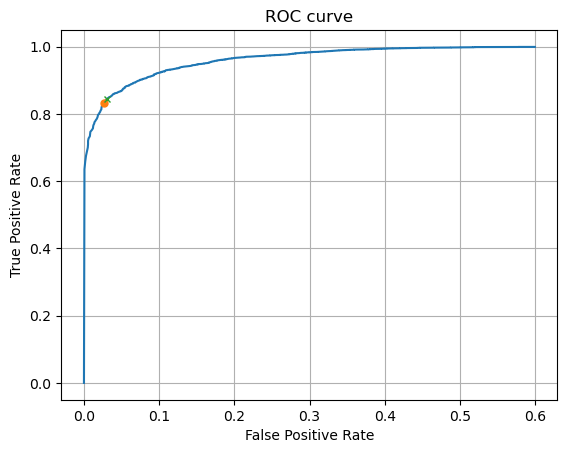

In [23]:

# theoretical gamma 
plt.plot(FPR,TPR)
plt.plot(FPR_th,TPR_th,marker = 'o', markersize = 5)
plt.plot(emperical_FPRopt,emperical_TPRopt,marker = 'x', markersize = 5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.grid(True)
